Importing necessary modules

In [1]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

C:\Users\Home\AppData\Roaming\Python\Python39\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\Home\AppData\Roaming\Python\Python39\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


Downloading MNIST images, and specifing path

In [2]:
path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('C:/Users/Home/.fastai/data/mnist_png/testing'),Path('C:/Users/Home/.fastai/data/mnist_png/training')]

In [3]:
(path/'training').ls()

(#10) [Path('C:/Users/Home/.fastai/data/mnist_png/training/0'),Path('C:/Users/Home/.fastai/data/mnist_png/training/1'),Path('C:/Users/Home/.fastai/data/mnist_png/training/2'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3'),Path('C:/Users/Home/.fastai/data/mnist_png/training/4'),Path('C:/Users/Home/.fastai/data/mnist_png/training/5'),Path('C:/Users/Home/.fastai/data/mnist_png/training/6'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7'),Path('C:/Users/Home/.fastai/data/mnist_png/training/8'),Path('C:/Users/Home/.fastai/data/mnist_png/training/9')]

In [4]:
threes = (path/'training/3').ls().sorted()
threes

(#6131) [Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10000.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10011.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10031.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10034.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10042.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10052.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/1007.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10074.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/3/10091.png')...]

In [5]:
sevens = (path/'training/7').ls().sorted()
sevens

(#6265) [Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10002.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/1001.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10014.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10019.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10039.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10046.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10050.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10063.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10077.png'),Path('C:/Users/Home/.fastai/data/mnist_png/training/7/10086.png')...]

###### threes and sevens are list containing file names of training set. We can access each by Image.open(seven[1])

Using Image class to display the images

In [6]:
for i in range(3):
    display(Image.open(threes[i]))
    display(Image.open(sevens[i]))

Using matplotlib to display the images (not necessary)

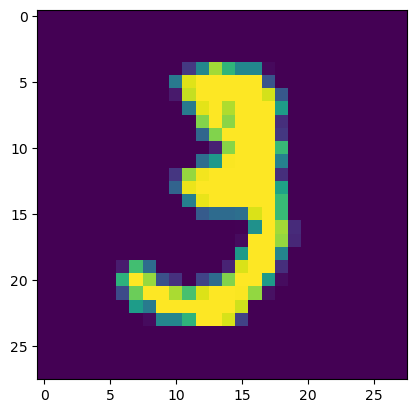

In [7]:

path_img = path/'training'/'3'

for i in get_image_files(path_img)[:1]:
    img = plt.imread(i)
    plt.imshow(img)
    plt.show()


Using show_image to show images

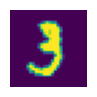

In [8]:
for i in range(1):
    show_image(Image.open(threes[i]))

Seeing how the image is represented in the computer

In [9]:
s = tensor(Image.open(threes[0])) 
df = pd.DataFrame(s[3:28,3:28])
df = df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,24,209,254,254,254,171,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,91,137,253,254,254,254,112,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,40,214,250,254,254,254,254,254,34,0,0,0,0,0,0,0,0,0


Comparing pixels

In [10]:
sevens_tensor = [tensor(Image.open(o)) for o in sevens]
threes_tensor = [tensor(Image.open(o)) for o in threes]
len(sevens_tensor), len(threes_tensor)

# represented as a list of tensors

(6265, 6131)

In [11]:
stacked_sevens = torch.stack(sevens_tensor).float()/255
stacked_threes = torch.stack(threes_tensor).float()/255

# stacked the list into one tensor. So this is one big 3-ranked tensor,
# with the tensors in first dimenstion, and the data represented in the
# other two dimensions

print(stacked_threes.shape,stacked_sevens.shape)

torch.Size([6131, 28, 28]) torch.Size([6265, 28, 28])


In [12]:
stacked_sevens.ndim
# Rank

3

Ideal three and seven

###### We take the average of all 3's and 7's in the dataset and show it. This is our ideal three and seven.

<AxesSubplot:>

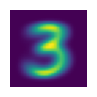

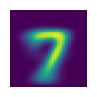

In [13]:
mean_3 = stacked_threes.mean(0)
show_image(mean_3)
mean_7 = stacked_sevens.mean(0)
show_image(mean_7)

# We created the tensor mean_3, which is the mean of all the 3's in 
# the data. This is the IDEAL THREE from the dataset.
# Similarly, for seven.

Function to classify three

In [14]:
def is_3(x):
    return (x - mean_3).abs().mean((-1,-2)) < (x - mean_7).abs().mean((-1,-2))

Getting the validation data

In [15]:
valid_path = (path/'testing'/'3').ls()
# print(valid)
valid_3 = [tensor(Image.open(o)) for o in valid_path]
test_3 = torch.stack(valid_3).float()

valid_path = (path/'testing'/'7').ls()
valid_7 = [tensor(Image.open(o)) for o in valid_path]
test_7 = torch.stack(valid_7).float()

# Thus test_3 and test_7 are the stacked tensor containing the 
# validation data.

Accuracy

In [16]:
print(is_3(test_3).float().mean())
print(1 - is_3(test_7).float().mean())

tensor(0.9436)
tensor(0.9815)


###### Thus we have an accuracy of 94 and 98 % in predicting 3's and 7's